In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('hw3.ok')

Assignment: hw3
OK, version v1.14.15



# Homework 3: Trump, Twitter, and Movies

## Due Date: Friday, May 31 5:00 pm PST

Welcome to the third homework assignment of INT15! In this assignment, we will work with Twitter data in order to analyze Donald Trump's tweets.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below.

**Collaborators**: *list collaborators here*

In [2]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import zipfile

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

Run the cell below to unzip and read tweets from the json file into a list named `all_tweets`.

In [3]:
# Unzip the dataset
dest_path = 'hw3-realdonaldtrump_tweets.json.zip'
my_zip = zipfile.ZipFile(dest_path, 'r')
with my_zip.open('hw3-realdonaldtrump_tweets.json', 'r') as f:
    all_tweets = json.load(f)

Here is what a typical tweet from `all_tweets` looks like:

In [4]:
from pprint import pprint # to get a more easily-readable view.
pprint(all_tweets[-1])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 16 18:40:18 +0000 2018',
 'display_text_range': [0, 174],
 'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
 'favorite_count': 52115,
 'favorited': False,
 'full_text': 'Just spoke with the Crown Prince of Saudi Arabia who totally '
              'denied any knowledge of what took place in their Turkish '
              'Consulate. He was with Secretary of State Mike Pompeo...',
 'geo': None,
 'id': 1052268011900555265,
 'id_str': '1052268011900555265',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 13493,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" '
           'rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'user': {'contributors_enabled': False,
  

## Question 1

Let's construct a DataFrame called `trump` containing data from all the tweets stored in `all_tweets`. The index of the DataFrame should be the ID of each tweet (looks something like `907698529606541312`). It should have these columns:

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet. 

Finally, **the resulting DataFrame should be sorted by the index.**

**Warning:** *Some tweets will store the text in the `text` field and other will use the `full_text` field.*

<!--
BEGIN QUESTION
name: q1
points: 2
-->

In [5]:
trump = pd.DataFrame({
    'time': pd.to_datetime([tweet['created_at'] for tweet in all_tweets]).tz_convert(None),
    'source': [tweet['source'] for tweet in all_tweets],
    'text': [tweet['text'] if "text" in tweet else tweet['full_text'] for tweet in all_tweets],
    'retweet_count':[tweet['retweet_count'] for tweet in all_tweets]
}, index=[tweet['id'] for tweet in all_tweets],
   columns=['time', 'source', 'text', 'retweet_count'],
).sort_index()
trump.head()

,time,source,text,retweet_count
690171032150237184,2016-01-21 13:56:11,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","""@bigop1: @realDonaldTrump @SarahPalinUSA https://t.co/3kYQGqeVyD""",1059
690171403388104704,2016-01-21 13:57:39,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","""@AmericanAsPie: @glennbeck @SarahPalinUSA Remember when Glenn gave out gifts to ILLEGAL ALIENS at crossing the border? Me too!""",1339
690173226341691392,2016-01-21 14:04:54,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",So sad that @CNN and many others refused to show the massive crowd at the arena yesterday in Oklahoma. Dishonest reporting!,2006
690176882055114758,2016-01-21 14:19:26,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","Sad sack @JebBush has just done another ad on me, with special interest money, saying I won't beat Hillary - I WILL. But he can't beat me.",2266
690180284189310976,2016-01-21 14:32:57,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Low energy candidate @JebBush has wasted $80 million on his failed presidential campaign. Millions spent on me. He should go home and relax!,2886


In [6]:
ok.grade("q1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 9
    Failed: 0
[ooooooooook] 100.0% passed



---
# Part 2: Tweet Source Analysis

In the following questions, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the `'source'` field:

In [7]:
trump['source'].unique()

array(['<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M5)</a>',
       '<a href="http://instagram.com" rel="nofollow">Instagram</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="https://periscope.tv" rel="nofollow">Periscope</a>',
       '<a href="https://ads.twitter.com" rel="nofollow">Twitter Ads</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>'],
      dtype=object)

## Question 2

Notice how sources like "Twitter for Android" or "Instagram" are surrounded by HTML tags. In the cell below, clean up the `source` field by removing the HTML tags from each `source` entry.

**Hints:** 
* Use `trump['source'].str.replace` along with a regular expression.
* You may find it helpful to experiment with regular expressions at [regex101.com](https://regex101.com/).

<!--
BEGIN QUESTION
name: q2
points: 1
-->

In [8]:
## Uncomment and complete
# trump['source'] = ...
trump['source']=trump['source'].str.replace(r"<[^>]*>", "") 

In [9]:
ok.grade("q2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In the following plot, we see that there are two device types that are more commonly used than others.

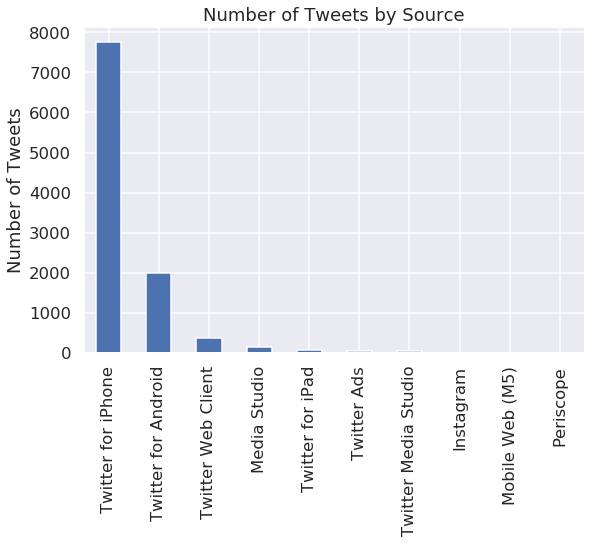

In [10]:
plt.figure(figsize=(8, 6))
trump['source'].value_counts().plot(kind="bar")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets by Source");

## Question 3

Now that we have cleaned up the `source` field, let's now look at which device Trump has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years)

In [11]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

trump['year'] = trump['time'].apply(year_fraction)

Now, use `sns.distplot` to overlay the distributions of Trump's 2 most frequently used web technologies over the years. Your final plot should look like:

<img src="images/source_years_q3.png" width="600px" />

<!--
BEGIN QUESTION
name: q3
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

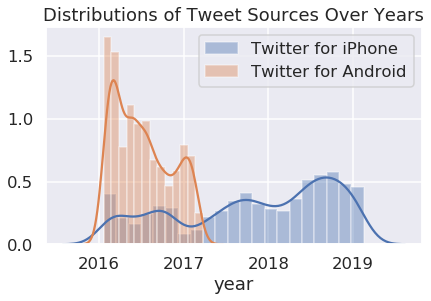

In [12]:
# Hint: use sns.distplot(..., label = ...)
top_devices = trump['source'].value_counts().head(2).index
for device in top_devices:
    sns.distplot(trump[trump['source']==device]['year'],label=device,hist=True)
plt.title('Distributions of Tweet Sources Over Years')
plt.legend();

## Question 4


Is there a difference between Trump's tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android device come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the `+0000` in the first few tweets).

In [13]:
for tweet in all_tweets[:3]:
    print(tweet['created_at'])

Wed Oct 12 14:00:48 +0000 2016
Wed Oct 12 13:46:43 +0000 2016
Wed Oct 12 12:59:05 +0000 2016


We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [14]:
trump['est_time'] = (
    trump['time'].dt.tz_localize("UTC") # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
trump.head()

,time,source,text,retweet_count,year,est_time
690171032150237184,2016-01-21 13:56:11,Twitter for Android,"""@bigop1: @realDonaldTrump @SarahPalinUSA https://t.co/3kYQGqeVyD""",1059,2016.054645,2016-01-21 08:56:11-05:00
690171403388104704,2016-01-21 13:57:39,Twitter for Android,"""@AmericanAsPie: @glennbeck @SarahPalinUSA Remember when Glenn gave out gifts to ILLEGAL ALIENS at crossing the border? Me too!""",1339,2016.054645,2016-01-21 08:57:39-05:00
690173226341691392,2016-01-21 14:04:54,Twitter for Android,So sad that @CNN and many others refused to show the massive crowd at the arena yesterday in Oklahoma. Dishonest reporting!,2006,2016.054645,2016-01-21 09:04:54-05:00
690176882055114758,2016-01-21 14:19:26,Twitter for Android,"Sad sack @JebBush has just done another ad on me, with special interest money, saying I won't beat Hillary - I WILL. But he can't beat me.",2266,2016.054645,2016-01-21 09:19:26-05:00
690180284189310976,2016-01-21 14:32:57,Twitter for Android,Low energy candidate @JebBush has wasted $80 million on his failed presidential campaign. Millions spent on me. He should go home and relax!,2886,2016.054645,2016-01-21 09:32:57-05:00


### Question 4a

Add a column called `hour` to the `trump` table which contains the hour of the day as a floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$

* **Hint:** See the cell above for an example of working with [dt accessors](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-dt-accessors). E.g., use `dt.hour` to get the hour from the `trump['est_time']` series.

<!--
BEGIN QUESTION
name: q4a
points: 1
-->

In [15]:
trump['hour'] =(trump['est_time'].dt.hour+trump['est_time'].dt.minute/60+trump['est_time'].dt.second/(60**2))

In [16]:
ok.grade("q4a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 4b

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look similar to the following:

<img src="images/device_hour4b.png" width="600px" />

<!--
BEGIN QUESTION
name: q4b
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

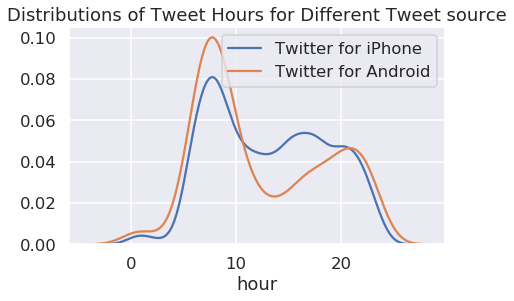

In [17]:
### make your plot here

for device in top_devices:
    sns.distplot(trump[trump['source'] == device]['hour'], label = device, hist=False)
plt.title('Distributions of Tweet Hours for Different Tweet source')
plt.legend();

### Question 4c

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Let's see if this information significantly changes our plot. Create a figure similar to your figure from question 4b, but this time, only use tweets that were tweeted before 2017. Your plot should look similar to the following:

<img src="images/device_hour4c.png" width="600px" />

<!--
BEGIN QUESTION
name: q4c
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

In [73]:
from datetime import datetime
early_trump=trump[trump['year']<2017]
top_devices2017 = trump['source'].value_counts().head(2).index


Text(0.5, 1.0, 'Distributions of Tweet Hours for Different Tweet source (pre-2017)')

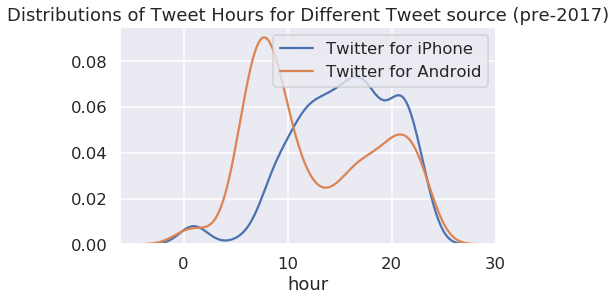

In [74]:
for device2 in top_devices2017:
    sns.distplot(early_trump[early_trump['source'] == device2]['hour'], label=device2, hist=False)
plt.title('Distributions of Tweet Hours for Different Tweet source (pre-2017)')
    

### Question 4d

During the campaign, it was theorized that Donald Trump's tweets from Android devices were written by him personally, and the tweets from iPhones were from his staff. Does your figure give support to this theory? What kinds of additional analysis could help support or reject this claim?

<!--
BEGIN QUESTION
name: q4d
points: 1
manual: true
-->
<!-- EXPORT TO PDF -->

Yes，my figure give support to this theory. Base on the figure, we can see there is a time different between Android devices and iPhones. Tweets from Android devices always publish in the early morning or midnight which is not in the working hours, and the tweets from iPhones always publish in the normal working hour from 10.am to 8.pm.

---
# Part 3: Sentiment Analysis

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [75]:
print(''.join(open("vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



## Question 5

As you can see, the lexicon contains emojis too! Each row contains a word and the *polarity* of that word, measuring how positive or negative the word is.

(How did they decide the polarities of these words? What are the other two columns in the lexicon? See the link above.)

### Question 5a

Read in the lexicon into a DataFrame called `sent`. The index of the DataFrame should be the words in the lexicon. `sent` should have one column named `polarity`, storing the polarity of each word.

* **Hint:** The `pd.read_csv` function may help here. Note that `pd.read_csv` can read data in other, similar formats, especially, if its parameter `sep` is set correctly. You might also look up which parameters will allow you to select specific columns and set an index column.

<!--
BEGIN QUESTION
name: q5a
points: 1
-->

In [76]:
sent =pd.read_csv('vader_lexicon.txt', sep='\t',
    usecols=[0, 1], header=None, names=['token', 'polarity'],
    index_col='token')
sent.head()

,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [77]:
ok.grade("q5a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



### Question 5b

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

First, let's lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `trump` DataFrame to be the lowercased text of each tweet.

<!--
BEGIN QUESTION
name: q5b
points: 1
-->

In [78]:
trump['text']=trump['text'].str.lower()
trump.head()

,time,source,text,retweet_count,year,est_time,hour,no_punc,polarity
690171032150237184,2016-01-21 13:56:11,Twitter for Android,"""@bigop1: @realdonaldtrump @sarahpalinusa https://t.co/3kyqgqevyd""",1059,2016.054645,2016-01-21 08:56:11-05:00,8.936389,bigop1 realdonaldtrump sarahpalinusa https t co 3kyqgqevyd,0.0
690171403388104704,2016-01-21 13:57:39,Twitter for Android,"""@americanaspie: @glennbeck @sarahpalinusa remember when glenn gave out gifts to illegal aliens at crossing the border? me too!""",1339,2016.054645,2016-01-21 08:57:39-05:00,8.960833,americanaspie glennbeck sarahpalinusa remember when glenn gave out gifts to illegal aliens at crossing the border me too,-2.6
690173226341691392,2016-01-21 14:04:54,Twitter for Android,so sad that @cnn and many others refused to show the massive crowd at the arena yesterday in oklahoma. dishonest reporting!,2006,2016.054645,2016-01-21 09:04:54-05:00,9.081667,so sad that cnn and many others refused to show the massive crowd at the arena yesterday in oklahoma dishonest reporting,-6.0
690176882055114758,2016-01-21 14:19:26,Twitter for Android,"sad sack @jebbush has just done another ad on me, with special interest money, saying i won't beat hillary - i will. but he can't beat me.",2266,2016.054645,2016-01-21 09:19:26-05:00,9.323889,sad sack jebbush has just done another ad on me with special interest money saying i won t beat hillary i will but he can t beat me,4.3
690180284189310976,2016-01-21 14:32:57,Twitter for Android,low energy candidate @jebbush has wasted $80 million on his failed presidential campaign. millions spent on me. he should go home and relax!,2886,2016.054645,2016-01-21 09:32:57-05:00,9.549167,low energy candidate jebbush has wasted 80 million on his failed presidential campaign millions spent on me he should go home and relax,-2.6


In [79]:
ok.grade("q5b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 5c

Now, let's get rid of punctuation since it will cause us to fail to match words. Create a new column called `no_punc` in the `trump` DataFrame to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be *any character that isn't a Unicode word character or a whitespace character* (consult the Python documentation on regexes for how to represent them).

(Why don't we simply remove punctuation instead of replacing with a space? See if you can figure this out by looking at the tweet data.)

<!--
BEGIN QUESTION
name: q5c
points: 1
-->

In [80]:
# Save your regex in punct_re
punct_re = r'[^\w\s]'
trump['no_punc'] = trump['text'].str.replace(punct_re,' ')

In [81]:
trump['no_punc']

690171032150237184                                                                                                                                                                                                                           bigop1   realdonaldtrump   sarahpalinusa https   t co 3kyqgqevyd 
690171403388104704                                                                                                                                                             americanaspie    glennbeck  sarahpalinusa remember when glenn gave out gifts to illegal aliens at crossing the border  me too  
690173226341691392                                                                                                                                                                 so sad that  cnn and many others refused to show the massive crowd at the arena yesterday in oklahoma  dishonest reporting 
690176882055114758                                                                         

In [82]:
ok.grade("q5c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 10
    Failed: 0
[ooooooooook] 100.0% passed



### Question 5d

Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `trump` to create a table called `tidy_format`. **The index of the table should be the IDs of the tweets, repeated _once for every word_ in the tweet**. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.

The first few rows of our `tidy_format` table look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>894661651760377856</th>
      <td>0</td>
      <td>i</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>1</td>
      <td>think</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>2</td>
      <td>senator</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>3</td>
      <td>blumenthal</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>4</td>
      <td>should</td>
    </tr>
  </tbody>
</table>

**Note that your DataFrame may look different from the one above.** However, you can double check that your tweet with ID `894661651760377856` has the same rows as ours. Our tests don't check whether your table looks exactly like ours.

As usual, try to **avoid using** any `for` loops. Our solution uses a chain of 5 methods on the `trump` DataFrame, albeit using some rather advanced Pandas hacking.

* **Hint 1:** Try looking at the `expand` argument to pandas' `str.split`.

* **Hint 2:** Try looking at the `stack()` method.

* **Hint 3:** Try looking at the `level` parameter of the `reset_index` method.

* **Hint 4:** You might need to `rename(columns={...})`.

<!--
BEGIN QUESTION
name: q5d
points: 2
-->

In [83]:
tidy_format = trump['no_punc'].str.split(expand=True).stack().reset_index(level=1).rename(columns={'level_1':'num',0:'word'})

In [84]:
ok.grade("q5d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 5e

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `trump` table.  The `polarity` column should contain **the sum of the sentiment polarity** of each word in the text of the tweet.

**Hints:** 
* You will need to `merge` the `tidy_format` and `sent` tables and group the final answer on the `index`.
* If certain words are not found in the `sent` table, set their polarities to 0 (use `fillna()`).

<!--
BEGIN QUESTION
name: q5e
points: 2
-->

In [85]:
trump['polarity'] = (
tidy_format
.merge(sent, how='left', left_on='word', right_index=True)
.reset_index()
.loc[:, ['index', 'polarity']]
.groupby('index')
.sum()
.fillna(0))
trump[['text', 'polarity']].head()

,text,polarity
690171032150237184,"""@bigop1: @realdonaldtrump @sarahpalinusa https://t.co/3kyqgqevyd""",0.0
690171403388104704,"""@americanaspie: @glennbeck @sarahpalinusa remember when glenn gave out gifts to illegal aliens at crossing the border? me too!""",-2.6
690173226341691392,so sad that @cnn and many others refused to show the massive crowd at the arena yesterday in oklahoma. dishonest reporting!,-6.0
690176882055114758,"sad sack @jebbush has just done another ad on me, with special interest money, saying i won't beat hillary - i will. but he can't beat me.",4.3
690180284189310976,low energy candidate @jebbush has wasted $80 million on his failed presidential campaign. millions spent on me. he should go home and relax!,-2.6


In [86]:
ok.grade("q5e");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



Now we have a measure of the sentiment of each of his tweets! Note that this calculation is rather basic; you can read over the VADER readme to understand a more robust sentiment analysis.

Now, run the cells below to see the most positive and most negative tweets from Trump in your dataset:

In [87]:
print('Most negative tweets:')
for t in trump.sort_values('polarity').head()['text']:
    print('\n  ', t)

Most negative tweets:

   the trump portrait of an unsustainable border crisis is dead on. “in the last two years, ice officers made 266,000 arrests of aliens with criminal records, including those charged or convicted of 100,000 assaults, 30,000 sex crimes &amp; 4000 violent killings.” america’s southern....

   it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!

   the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!

   ...this evil anti-semitic attack is an assault on humanity. it will take all of us working together to extract the poison of an

In [88]:
print('Most positive tweets:')
for t in trump.sort_values('polarity', ascending=False).head()['text']:
    print('\n  ', t)

Most positive tweets:

   congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!

   congratulations to a truly great football team, the clemson tigers, on an incredible win last night against a powerful alabama team. a big win also for the great state of south carolina. look forward to seeing the team, and their brilliant coach, for the second time at the w.h.

   my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!

   thank you to all of my great supporters, really big progress being made. other countries wanting to fix crazy trade deals. economy is roaring. supreme court pick getting great reviews. new

## Question 6

Now, let's try looking at the distributions of sentiments for tweets containing certain keywords.

### Question 6a

In the cell below, create a single plot showing both the distribution of tweet sentiments for tweets containing `nytimes`, as well as the distribution of tweet sentiments for tweets containing `fox`.

**Hint**: You can use `str.contains()`.

<!--
BEGIN QUESTION
name: q6a
points: 1
manual: true
-->
<!-- EXPORT TO PDF -->

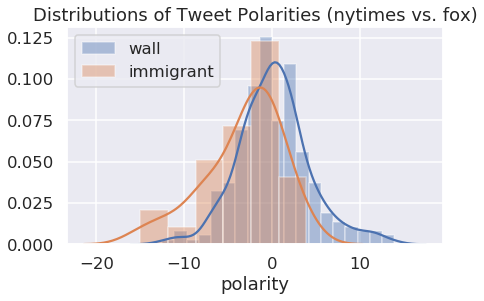

In [89]:
...
sns.distplot(trump[trump['text'].str.lower().str.contains(pat='wall')]['polarity'],label='wall' )
sns.distplot(trump[trump['text'].str.lower().str.contains(pat='immigrant')]['polarity'],label='immigrant' )
plt.title('Distributions of Tweet Polarities (nytimes vs. fox)')
plt.legend();

### Question 6b
Comment on what you observe in the plot above. Can you find other pairs of keywords that lead to interesting plots? (If you modify your code in 6a, remember to change the words back to `nytimes` and `fox` before submitting for grading).

<!--
BEGIN QUESTION
name: q6b
points: 1
-->

*I try the pairs of Wall and immigrant. I think this is interesting because Trump mention these two words a lot during the election. Base on the graph we can see the word "immigrant" has more negative polarity than the word "wall". We can assume every thime Trump mentions the word "wall" he talks about his great plan. *

# Part 4: Movie Recommendation System

## Question 7

Your TA, Pushkar, has only recently started watching movies. While chatting with you, he asks you to recommed some good movies to add to his queue. Normally, you would have told him the movies that you liked but since you are taking INT15, you decide to do this in a data-science fashion. You create your own movie recommendation system that can later be used by Pushkar to watch the movies that he might like.


### Question 7a: Data

You decide to use the IMDB dataset [https://www.imdb.com/interfaces](https://www.imdb.com/interfaces/), which contains the names of the movies along with their respective ratings. 

Let's import the top 1000 movies with their plots stored in the files `top_1000_movies.csv` and `plots.csv`.

<!--
BEGIN QUESTION
name: q7a
points: 1
manual: false
-->

In [90]:
all_movies = pd.read_csv('top_1000_movies.csv')
plots = pd.read_csv('plots.csv')

In [91]:
ok.grade("q7a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Let's preview the top entries of both datasets.

In [92]:
all_movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2088312
1,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2054763
2,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,1829630
3,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,1669605
4,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,1632339


In [93]:
plots.head()

,Unnamed: 0,plots
0,tt0027977,The Tramp struggles to live in modern industrial society with the help of a young homeless woman.
1,tt0031381,A manipulative woman and a roguish man conduct a turbulent romance during the American Civil War and Reconstruction periods.
2,tt0032138,Dorothy Gale is swept away from a farm in Kansas to a magical land of Oz in a tornado and embarks on a quest with her new friends to see the Wizard who can help her return home to Kansas and help her friends as well.
3,tt0032553,Dictator Adenoid Hynkel tries to expand his empire while a poor Jewish barber tries to avoid persecution from Hynkel's regime.
4,tt0033467,"Following the death of a publishing tycoon, news reporters scramble to discover the meaning of his final utterance."


Let's verify that we do not have any TV series, and if that is true, remove (`drop`) the "titleType" and "endYear" columns. 

In [94]:
all_movies[all_movies.titleType != "movie"] # should return an empty dataframe if we have only movies

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes


In [95]:
# Remove the uninformative columns mentioned above
movies =all_movies.drop(columns=['titleType', 'endYear'])
movies.head()

,tconst,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0111161,The Shawshank Redemption,The Shawshank Redemption,0,1994,142,Drama,9.3,2088312
1,tt0468569,The Dark Knight,The Dark Knight,0,2008,152,"Action,Crime,Drama",9.0,2054763
2,tt1375666,Inception,Inception,0,2010,148,"Action,Adventure,Sci-Fi",8.8,1829630
3,tt0137523,Fight Club,Fight Club,0,1999,139,Drama,8.8,1669605
4,tt0110912,Pulp Fiction,Pulp Fiction,0,1994,154,"Crime,Drama",8.9,1632339


Check, how many movies have their primary title differ from their original title?

In [96]:
diff_titles=set(movies["primaryTitle"])-set(movies["originalTitle"])
len(diff_titles)

50

### Question 7b: Merge the datasets
As you can see, both dataframes have a common ID (although, the column names do not match). Let's join the two files to combine the movies with their plots. Use the `df.merge` command in Pandas.

<!--
BEGIN QUESTION
name: q7b
-->

In [97]:
plots.rename(columns={'Unnamed: 0':'tconst'}, inplace=True)
# Write your code to merge the two dataframes
movies =movies.merge(plots, on='tconst')
movies.head(3)

,tconst,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,plots
0,tt0111161,The Shawshank Redemption,The Shawshank Redemption,0,1994,142,Drama,9.3,2088312,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency."
1,tt0468569,The Dark Knight,The Dark Knight,0,2008,152,"Action,Crime,Drama",9.0,2054763,"When the menace known as The Joker emerges from his mysterious past, he wreaks havoc and chaos on the people of Gotham. The Dark Knight must accept one of the greatest psychological and physical tests of his ability to fight injustice."
2,tt1375666,Inception,Inception,0,2010,148,"Action,Adventure,Sci-Fi",8.8,1829630,A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O.


In [98]:
ok.grade("q7b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 7c: Text preprocessing 

In [99]:
import re
import string
from nltk.corpus import stopwords
from nltk import word_tokenize



In [100]:
 import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
punct = string.punctuation

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Let's preprocess the plot of each movie by:

1. Converting all words to lower case

2. Removing numbers and punctuation

3. Tokenizing
    
4. Removing stop words 

<!--
BEGIN QUESTION
name: q7c
-->

In [101]:
movies['key_words'] = "key_words" # add a new column
movies['key_words'] = np.nan

# Convert to lowercase and remove leading/trailing whitespace
movies['key_words'] = (movies['plots']
 .str.lower()
 .str.strip()
)

# Remove Punctuation
punct_regex =r'[^\w\s]'
movies['key_words'] = movies['key_words'].str.replace(punct_regex, ' ')

# Remove Numbers
num_regex =r"\d"
movies['key_words'] = movies['key_words'].str.replace(num_regex, ' ')


# Extract the keywords (exclude stop words)
movies['key_words'] = (movies['key_words']
                       .apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words])))

# Tokenize the plots using word_tokenize  (use .apply like above)
movies['key_words']=(movies['key_words'].apply(word_tokenize))

movies.head()

,tconst,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,plots,key_words
0,tt0111161,The Shawshank Redemption,The Shawshank Redemption,0,1994,142,Drama,9.3,2088312,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.","[two, imprisoned, men, bond, number, years, finding, solace, eventual, redemption, acts, common, decency]"
1,tt0468569,The Dark Knight,The Dark Knight,0,2008,152,"Action,Crime,Drama",9.0,2054763,"When the menace known as The Joker emerges from his mysterious past, he wreaks havoc and chaos on the people of Gotham. The Dark Knight must accept one of the greatest psychological and physical tests of his ability to fight injustice.","[menace, known, joker, emerges, mysterious, past, wreaks, havoc, chaos, people, gotham, dark, knight, must, accept, one, greatest, psychological, physical, tests, ability, fight, injustice]"
2,tt1375666,Inception,Inception,0,2010,148,"Action,Adventure,Sci-Fi",8.8,1829630,A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O.,"[thief, steals, corporate, secrets, use, dream, sharing, technology, given, inverse, task, planting, idea, mind, c, e]"
3,tt0137523,Fight Club,Fight Club,0,1999,139,Drama,8.8,1669605,"An insomniac office worker and a devil-may-care soapmaker form an underground fight club that evolves into something much, much more.","[insomniac, office, worker, devil, may, care, soapmaker, form, underground, fight, club, evolves, something, much, much]"
4,tt0110912,Pulp Fiction,Pulp Fiction,0,1994,154,"Crime,Drama",8.9,1632339,"The lives of two mob hitmen, a boxer, a gangster & his wife, and a pair of diner bandits intertwine in four tales of violence and redemption.","[lives, two, mob, hitmen, boxer, gangster, wife, pair, diner, bandits, intertwine, four, tales, violence, redemption]"


In [102]:
ok.grade("q7c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



We now have a set of keywords for each of the movies. We can use these keywords to create a dictionary and use it to find movies with similar keywords.

### Question 7d

For analyzing each word in a corpus, we associate that word with a number by creating a dictionary. The dicitionary can be created using the `Dictionary` module from `gensim`. 
 
<!--
BEGIN QUESTION
name: q7d
-->

In [103]:
# Processing Keywords
processed_keywords=[]
for keywords in movies['key_words']:
    processed_keywords.append(keywords)
    

from gensim.corpora.dictionary import Dictionary
# Write your code here
dictionary =Dictionary(processed_keywords)  # initialize a Dictionary


In [104]:
ok.grade("q7d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [105]:
processed_keywords

[['two',
  'imprisoned',
  'men',
  'bond',
  'number',
  'years',
  'finding',
  'solace',
  'eventual',
  'redemption',
  'acts',
  'common',
  'decency'],
 ['menace',
  'known',
  'joker',
  'emerges',
  'mysterious',
  'past',
  'wreaks',
  'havoc',
  'chaos',
  'people',
  'gotham',
  'dark',
  'knight',
  'must',
  'accept',
  'one',
  'greatest',
  'psychological',
  'physical',
  'tests',
  'ability',
  'fight',
  'injustice'],
 ['thief',
  'steals',
  'corporate',
  'secrets',
  'use',
  'dream',
  'sharing',
  'technology',
  'given',
  'inverse',
  'task',
  'planting',
  'idea',
  'mind',
  'c',
  'e'],
 ['insomniac',
  'office',
  'worker',
  'devil',
  'may',
  'care',
  'soapmaker',
  'form',
  'underground',
  'fight',
  'club',
  'evolves',
  'something',
  'much',
  'much'],
 ['lives',
  'two',
  'mob',
  'hitmen',
  'boxer',
  'gangster',
  'wife',
  'pair',
  'diner',
  'bandits',
  'intertwine',
  'four',
  'tales',
  'violence',
  'redemption'],
 ['presidencies',


We can now visualize the frequency distribution of the most frequent words.

In [106]:
from nltk import FreqDist

In [107]:
### concatenate all keywords from all movies together
all_movie_words=[]
for word in processed_keywords:
    all_movie_words.extend(word) 

In [108]:
def plot_freq_words(words, terms = 10):

    fdist = FreqDist(words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

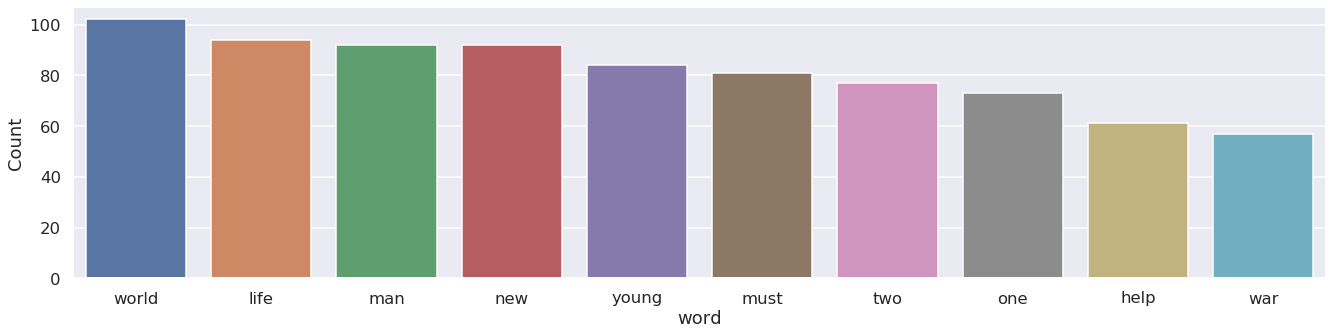

In [109]:
plot_freq_words(all_movie_words)

As you that the figure represents the top words and their frequencies in the corpus. Now we can do this for the  keywords for each movie.

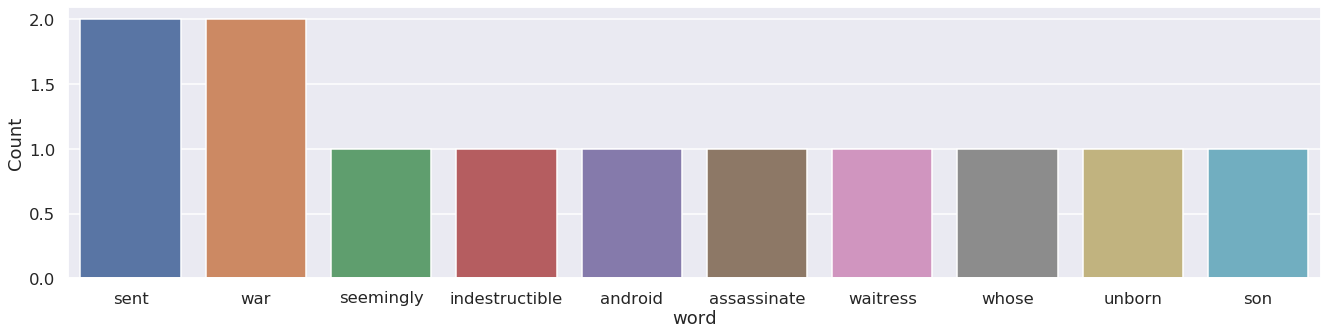

In [110]:
plot_freq_words(processed_keywords[70])  # get the frequency distribution for the words from a specific movie

In [111]:
processed_keywords[70]

['seemingly',
 'indestructible',
 'android',
 'sent',
 'assassinate',
 'waitress',
 'whose',
 'unborn',
 'son',
 'lead',
 'humanity',
 'war',
 'machines',
 'soldier',
 'war',
 'sent',
 'protect',
 'costs']

Can you guess which movie we selected above just by looking at the keywords?

The Terminator

### Question 7e

What we plotted above is known as a _bag of words_.
The Bag of Words is a list of tuples where the first index denotes the postion of the word in the dictionary while the second index denotes it's frequency. 

Go through all keywords in `processed_keywords` and add them to the dictionary we created above using the `doc2bow` command.
 
<!--
BEGIN QUESTION
name: q7e
-->

In [112]:
corpus = [dictionary.doc2bow(text) for text in processed_keywords]

In [113]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1)],
 [(13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1)],
 [(36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1)],
 [(18, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 2),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(9, 1),
  (11, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1)],
 [(78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88

In [114]:
ok.grade("q7e");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 7f: TF-IDF and Matrix similarity

In [115]:
from gensim.models.tfidfmodel import TfidfModel
from gensim.similarities import MatrixSimilarity

In [116]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1)],
 [(13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1)],
 [(36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1)],
 [(18, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 2),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(9, 1),
  (11, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1)],
 [(78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88

We can now create a `tfIdfModel` from `gensim`. The tfidfModel score will automatically give weigths to each of the keywords in the corpus. Based on these scores we will calculate the similarities between different movies using `MatrixSimilarity` function from `gensim`.
<!--
BEGIN QUESTION
name: q7f
-->

In [117]:
# Create the tf-idf model for the corpus created above 
tfidf =TfidfModel(corpus)

# Create the similarity data structure. 
# This is the most important part where we get the similarities between the movies.
# Hint: use the length of the dictionary as the num_features
sims=MatrixSimilarity(tfidf[corpus], num_features=len(dictionary))


In [118]:
sims[corpus[70]][20]

0.10148302

In [119]:
ok.grade("q7f");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



###  Part 4 : Putting it all together.  Movie Recommendation
Finally, you have come to the point where you can put together a movie recommendation system. 

Pushkar has recently heard about _Batman_ and asks you what movies he should watch that are similar to it. You fire up your movie recommender and give him the best set of suggestions. 

The recommender would go through the following set of steps:

1. Create the bag of words for the movie 
2. Calculate the tf-idf of the queried movie 
3. Calculate the similarity of the matrix
4. See which movies are the most similar to the given movie 
5. Sort the current movies by the similarity score

<!--
BEGIN QUESTION
name: q7g
-->

In [120]:
def movie_recommendation(movie_title, dictionary, number_of_hits=10):
    top_words = 5
    # We will first start by  getting all the keywords related to the movies
    movie = movies.loc[movies.primaryTitle==movie_title] # get the movie row
    keywords = movie['key_words']# Get all the keywords
    doc=[]
    for word in keywords:
        doc.extend(word)
    
    # Convert the doc into it's equivalent bag of words
    query_doc_bow = dictionary.doc2bow(doc)
    
    # convert the regular bag of words model to a tf-idf model where we have tuples
    # of the movie ID and its tf-idf value for the movie
    query_doc_tfidf = tfidf[query_doc_bow]
    
    # get the array of similarity values between our movie and every other movie. 
    # To do this, we pass our list of tf-idf tuples to sims.
    similarity_array = sims[query_doc_tfidf] 
    # the length is the number of movies we have. 

    similarity_series = pd.Series(similarity_array.tolist(), index=movies.primaryTitle.values) #Convert to a Series
    top_hits = similarity_series.sort_values(ascending=False)[1:number_of_hits+1] 
    #get the top matching results, i.e. most similar movies; 
    # start from index 1 because every movie is most similar to itself

    #print the words with the highest tf-idf values for the provided movie:
    sorted_tfidf_weights = sorted(tfidf[corpus[movie.index.values.tolist()[0]]], key=lambda w: w[1], reverse=True)
    print('Top %s words associated with this movie by tf-idf are: ' % top_words)
    for term_id, weight in sorted_tfidf_weights[:top_words]:
        print(" '%s' (tf-idf score = %.3f)" %(dictionary.get(term_id), weight))
    print("\n")
    
    # Print the top matching movies
    print("Top %s most similar movies for movie %s are:" %(number_of_hits, movie_title))
    top_movies=[]
    for idx, (movie,score) in enumerate(zip(top_hits.index, top_hits)):
        print("%d %s (similarity score = %.3f)" %(idx+1, movie, score))
        top_movies.append(movie)
    return top_movies

top_10_movies = movie_recommendation("Batman", dictionary)


Top 5 words associated with this movie by tf-idf are: 
 'clownishly' (tf-idf score = 0.387)
 'homicidal' (tf-idf score = 0.387)
 'joker' (tf-idf score = 0.325)
 'knight' (tf-idf score = 0.325)
 'major' (tf-idf score = 0.297)


Top 10 most similar movies for movie Batman are:
1 The Dark Knight (similarity score = 0.248)
2 Batman Begins (similarity score = 0.231)
3 The Dark Knight Rises (similarity score = 0.154)
4 Harry Potter and the Half-Blood Prince (similarity score = 0.117)
5 Batman Returns (similarity score = 0.106)
6 The Lincoln Lawyer (similarity score = 0.105)
7 Ghost in the Shell (similarity score = 0.101)
8 Batman & Robin (similarity score = 0.097)
9 Resident Evil: Apocalypse (similarity score = 0.084)
10 Sin City (similarity score = 0.080)


In [121]:
ok.grade("q7g");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



In [122]:
terminator = movie_recommendation("The Terminator",dictionary,number_of_hits=10)

Top 5 words associated with this movie by tf-idf are: 
 'sent' (tf-idf score = 0.349)
 'android' (tf-idf score = 0.308)
 'costs' (tf-idf score = 0.308)
 'indestructible' (tf-idf score = 0.308)
 'waitress' (tf-idf score = 0.277)


Top 10 most similar movies for movie The Terminator are:
1 Terminator Salvation (similarity score = 0.127)
2 A Good Day to Die Hard (similarity score = 0.103)
3 Platoon (similarity score = 0.100)
4 Captain America: The First Avenger (similarity score = 0.098)
5 The Matrix Revolutions (similarity score = 0.097)
6 The Twilight Saga: Breaking Dawn - Part 1 (similarity score = 0.095)
7 Men in Black II (similarity score = 0.091)
8 War of the Worlds (similarity score = 0.089)
9 Inglourious Basterds (similarity score = 0.089)
10 Pacific Rim (similarity score = 0.088)


In [123]:
inception = movie_recommendation("Inception",dictionary,number_of_hits=10)

Top 5 words associated with this movie by tf-idf are: 
 'inverse' (tf-idf score = 0.295)
 'planting' (tf-idf score = 0.295)
 'sharing' (tf-idf score = 0.295)
 'corporate' (tf-idf score = 0.266)
 'idea' (tf-idf score = 0.266)


Top 10 most similar movies for movie Inception are:
1 There's Something About Mary (similarity score = 0.076)
2 Gattaca (similarity score = 0.073)
3 Suicide Squad (similarity score = 0.072)
4 Sicario (similarity score = 0.071)
5 Crouching Tiger, Hidden Dragon (similarity score = 0.071)
6 Independence Day (similarity score = 0.070)
7 Dodgeball: A True Underdog Story (similarity score = 0.069)
8 Escape Plan (similarity score = 0.069)
9 Kiss Kiss Bang Bang (similarity score = 0.067)
10 Bruce Almighty (similarity score = 0.067)


**Looking at the scores for the movies, how do the top recommendations for the movie _Inception_ differ from those for the movie _The Terminator_?** 
* If you have seen any of the movies or looked at the recommendations for other movies, comment on how well the system is able to recommend similar movies. 
* What else could we do to improve our movie recommendations?

<!--
BEGIN QUESTION
name: q7h
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

*I didn't not see any of the movies before, but I think the recommendation system perform well, because in The Terminator, the 10 most similar movies are all related wtih action movie and violence scenes. And also in the In ception, we can see all the movies we recommend are fiction.Therefore, I think our recommendation system perform well.
I think one way to improve our movie recommendations is to make recommendations base on the leading actors,dirctor, and scriptwriter, and also base on the movie's genre. Because audience may prefer a particular actor or director or scriptwriter. *

Have fun exploring the new movies whose plot's keywords are similar to other movies' plots.

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

<!-- EXPECT 6 EXPORTED QUESTIONS -->

In [124]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('hw3.ipynb', 'hw3.pdf')
ok.submit()

Generating PDF...


/opt/conda/lib/python3.6/site-packages/nbconvert/utils/pandoc.py:52: RuntimeWarning: You are using an unsupported version of pandoc (2.7.2).
Your version must be at least (1.12.1) but less than (2.0.0).
Refer to http://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()
/opt/conda/lib/python3.6/site-packages/nbconvert/utils/pandoc.py:52: RuntimeWarning: You are using an unsupported version of pandoc (2.7.2).
Your version must be at least (1.12.1) but less than (2.0.0).
Refer to http://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()
/opt/conda/lib/python3.6/site-packages/nbconvert/utils/pandoc.py:52: RuntimeWarning: You are using an unsupported version of pandoc (2.7.2).
Your version must be at least (1.12.1) but less than (2.0.0).
Refer to http://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()
/opt/conda/lib/python3.6/site-packages/nbconvert/utils/pandoc.py:52: RuntimeWarning: You are using an unsu

Saved hw3.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw3.ipynb'.
Submit... 100% complete
Submission successful for user: h_lin@ucsb.edu
URL: https://okpy.org/ucsb/int15/sp19/hw03/submissions/NLy3wp

